# 2017 Lab Exam

_Set A_

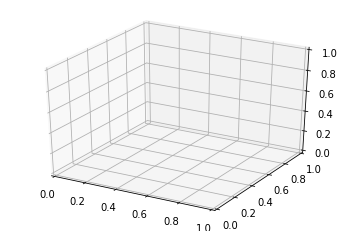

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
fig.tight_layout()
ax = fig.gca(projection='3d')

In [2]:
def initialise_notebook():
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    plt.rcParams['figure.figsize'] = 15, 10
    plt.rcParams['figure.dpi'] = 150
    
initialise_notebook()

## Pseudo Code

1. $I = \frac{4\pi cos(\phi)exp(j\omega t)}{\mu_o}$

2. The wire is on the x − y plane and centered at the origin.  
The radius of the loop is 10 cm and is also equal to $1/k = c/\omega$. 

3. $$ A_{ijkl}= \sum_{l=0}^{N-1}\frac{cos(\acute{\phi_{l}}) exp(jkR_{ijkl})\vec{d\acute{l}}}{R_{ijkl}} $$


4. $$Bz(z) = \frac {Ay(∆x,0,z)−Ax(0,∆y,z)−Ay(−∆x,0,z)+Ax (0,−∆y,z)}{2∆x + 2∆y} $$

Now follow:

for k in range(Niter)  
      save copy of A   
      update A array  
      assert boundaries  
      errors[k]=(abs(A-oldA)).max();  
#end


In [3]:
x=np.linspace(0,2,num=3)
y=np.linspace(0,2,num=3)
z=np.linspace(0,1000-1,num=1000)
X,Y,Z=np.meshgrid(x,y,z)

In [26]:
# print(x,y)
# print(z)
print(X)

print(Y)
print(Z)
print(X.shape, Y.shape, Z.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [1. 1. 1. ... 1. 1. 1.]
  [2. 2. 2. ... 2. 2. 2.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 1. 1. ... 1. 1. 1.]
  [2. 2. 2. ... 2. 2. 2.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 1. 1. ... 1. 1. 1.]
  [2. 2. 2. ... 2. 2. 2.]]]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]
  [2. 2. 2. ... 2. 2. 2.]]]
[[[  0.   1.   2. ... 997. 998. 999.]
  [  0.   1.   2. ... 997. 998. 999.]
  [  0.   1.   2. ... 997. 998. 999.]]

 [[  0.   1.   2. ... 997. 998. 999.]
  [  0.   1.   2. ... 997. 998. 999.]
  [  0.   1.   2. ... 997. 998. 999.]]

 [[  0.   1.   2. ... 997. 998. 999.]
  [  0.   1.   2. ... 997. 998. 999.]
  [  0.   1.   2. ... 997. 998. 999.]]]
(3, 3, 1000) (3, 3, 1000) (3, 3, 1000)


In [95]:
%matplotlib inline

In [11]:
a=10 # radius of wire
sections=100 # Number of sections
r_=np.vstack((a*np.cos(np.linspace(0,2*np.pi,sections)).T,a*np.sin(np.linspace(0,2*np.pi,sections)).T))
r_=r_.T
r_.shape

(100, 2)

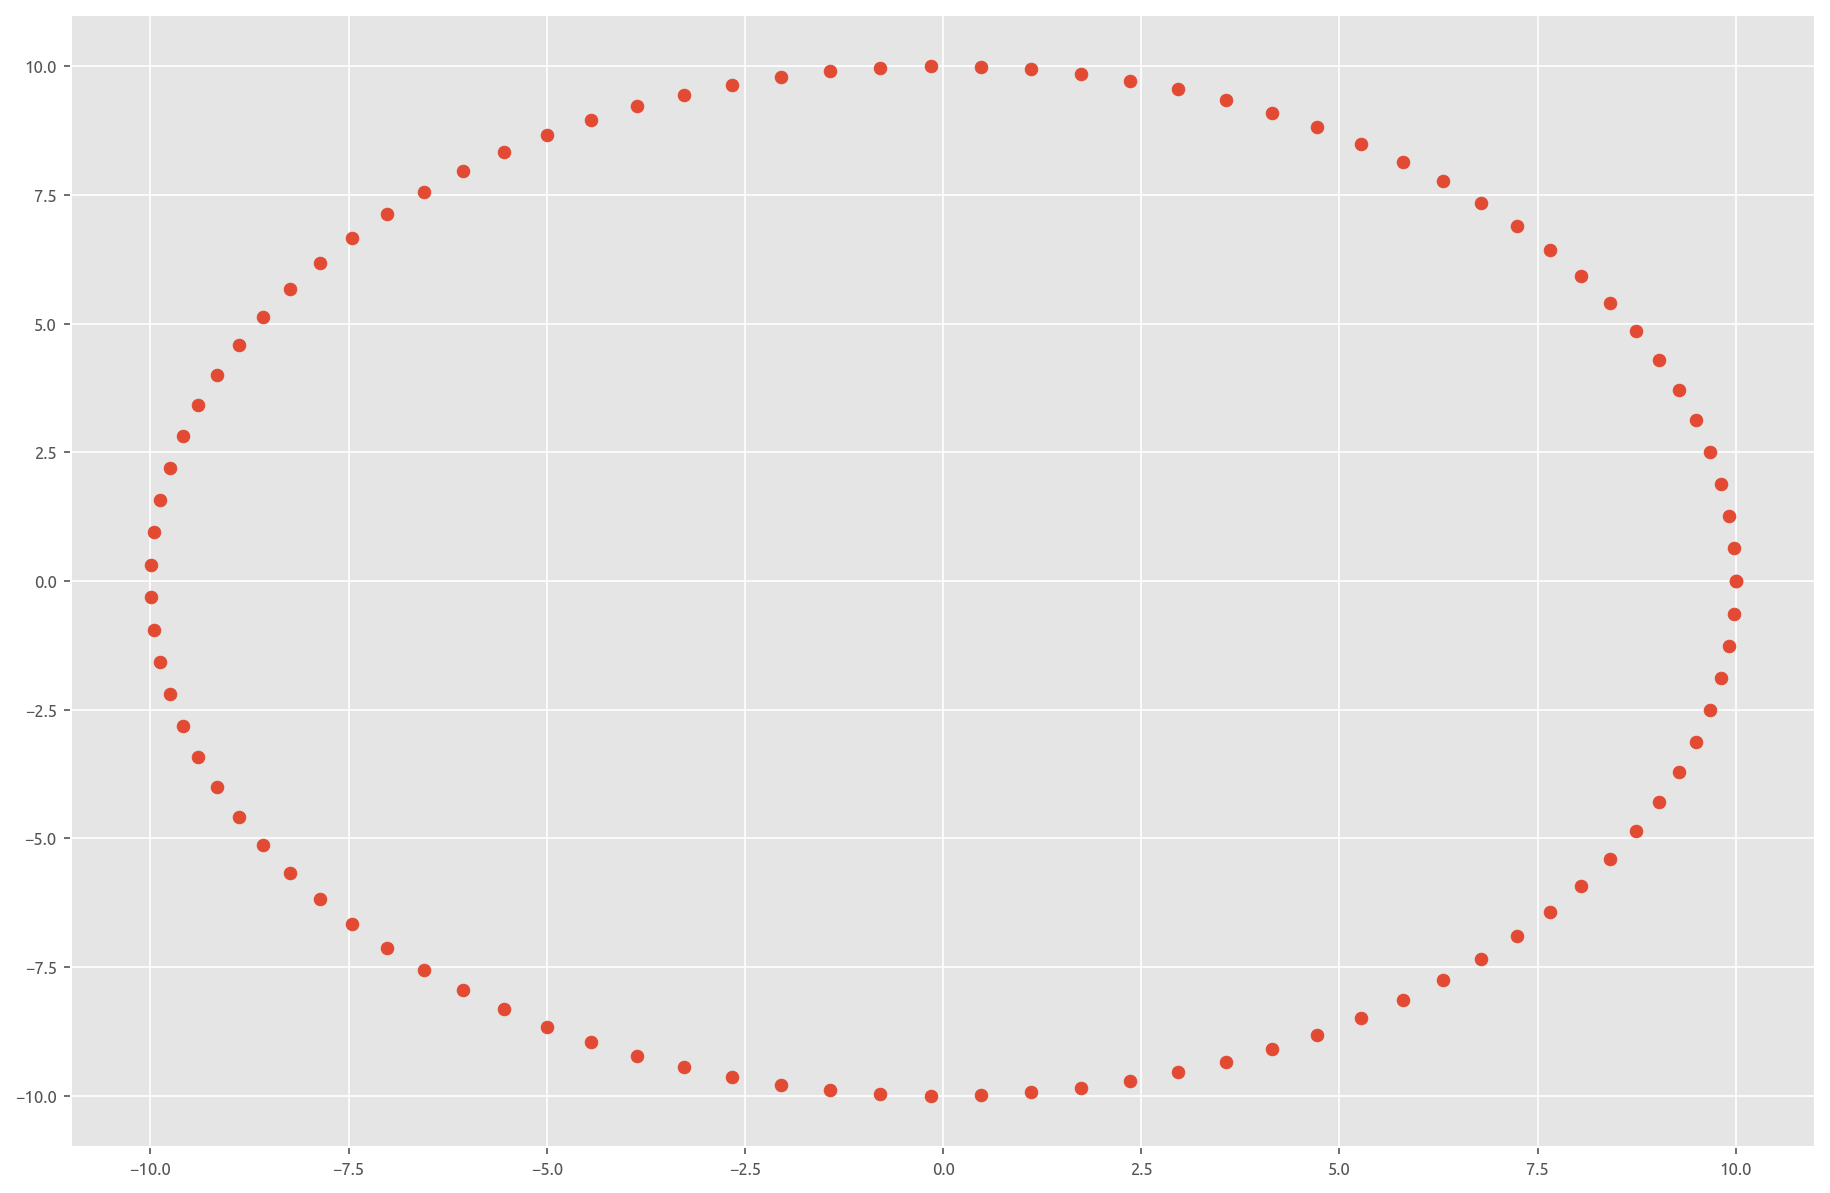

In [12]:
plt.scatter(r_[:,0],r_[:,1])
plt.show()

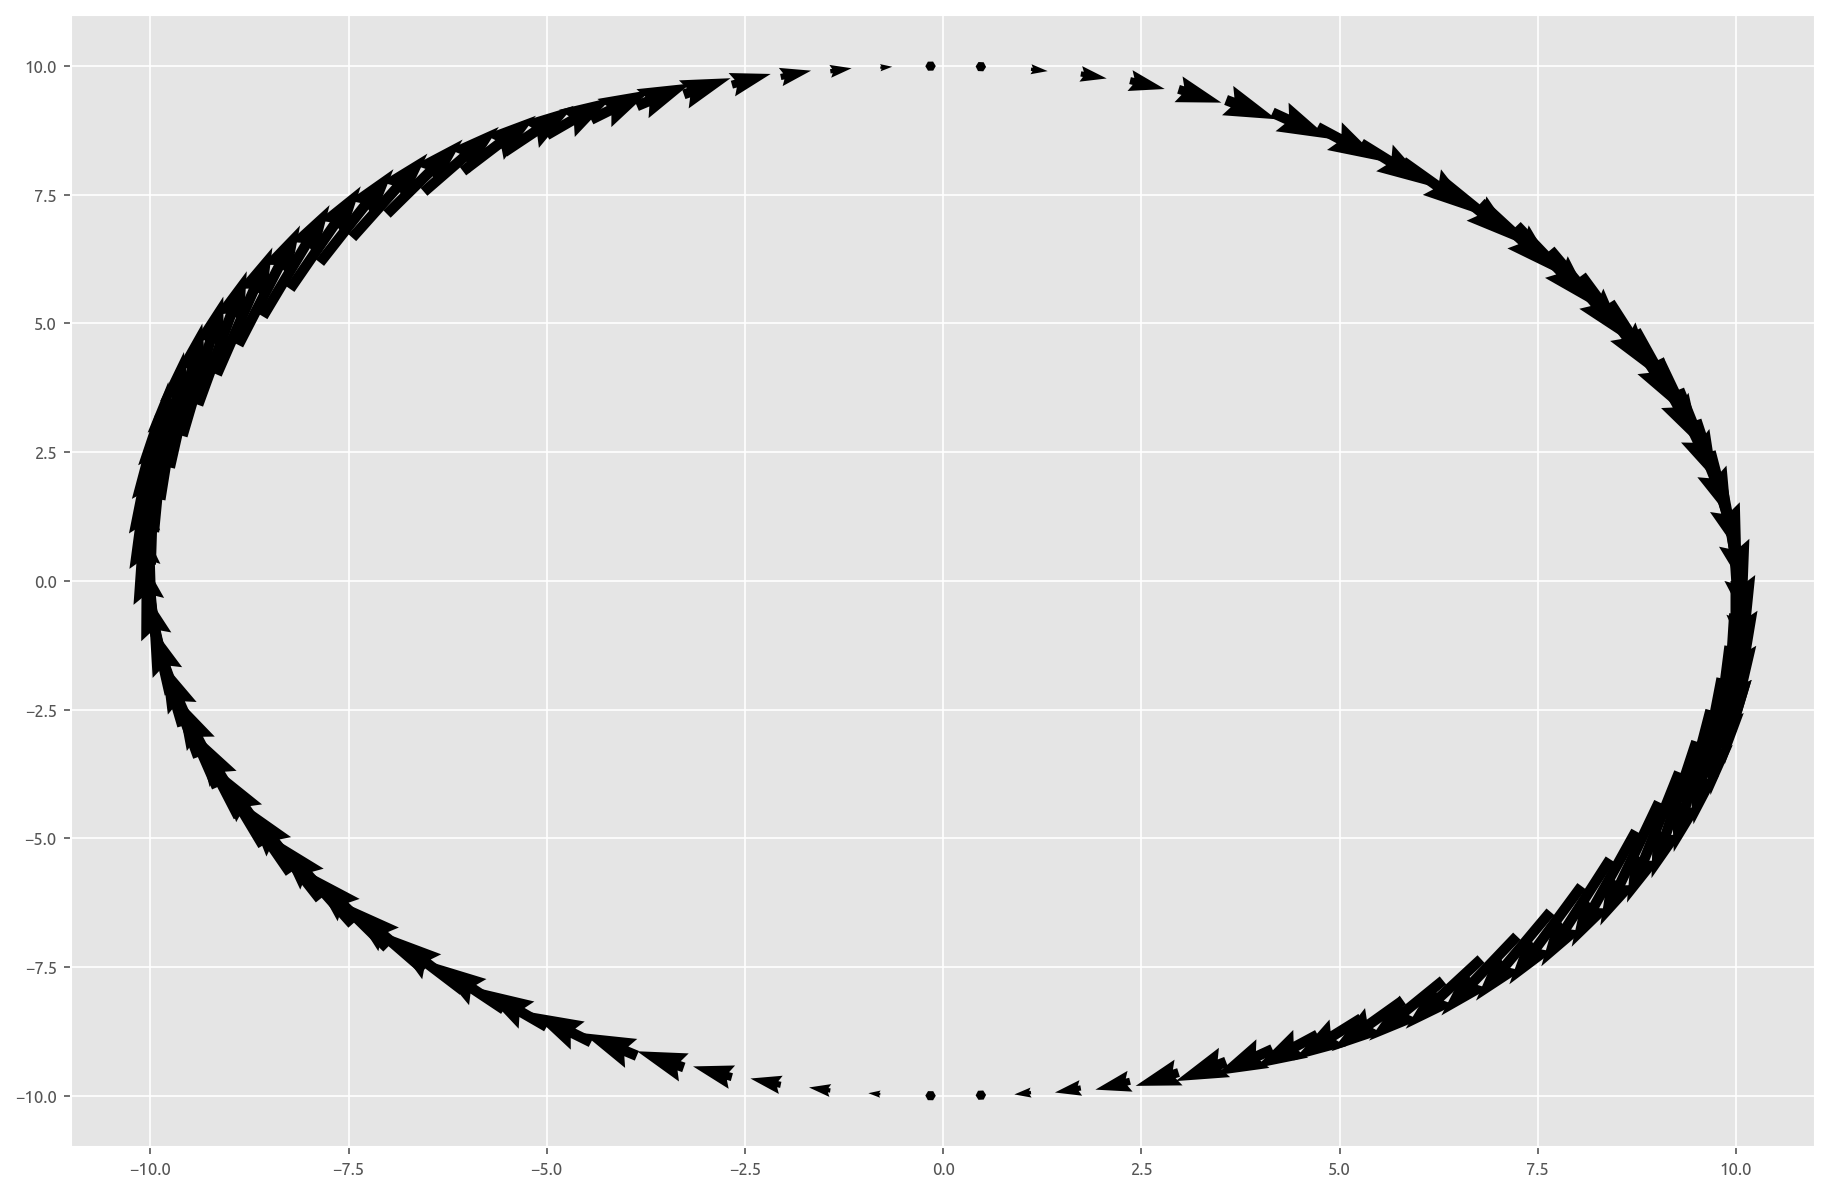

In [13]:
def current(x,y):
    '''
    Excluding time dependency
    '''
    return np.array([np.cos(np.arctan(y/x))*y,np.cos(np.arctan(y/x))*-x])

In [15]:
dl=2*np.pi*10/sections*np.vstack((np.cos(np.linspace(0,2*np.pi,sections)).T,np.sin(np.linspace(0,2*np.pi,sections)).T))
dl=dl.T
dl.shape

(100, 2)

In [39]:
r=np.array((X,Y,Z))
print(r.shape)
print()

(3, 3, 3, 1000)



In [17]:
def calc(l):
    '''
    find Rijkl
    Given l
    returns (3,3,1000) matrix
    '''
    ra=r.reshape((1,3,3,3,1000))
    ra_=np.hstack((r_,np.zeros((100,1))))
    
    return np.linalg.norm(np.tile(r,(100,1,1,1)).reshape((100,3,3,3,1000))-ra_.reshape((100,3,1,1,1)),axis=1)
    #return np.sqrt((r[0,:,:]-r_[l,0])**2+(r[1,:,:]-r_[l,1])**2+r[2,:,:]**2)
    #return np.sum((r-r_.reshape((100,2,1))))**2

In [18]:
phi=np.linspace(0,2*np.pi,sections)
A=np.sum(np.cos())

ValueError: invalid number of arguments

In [19]:
R=calc(0)
display(R.shape)
coses=np.cos(phi).reshape((100,1,1,1))
dl_s=dl[:,0].reshape((100,1,1,1))
B_1=coses*dl_s*np.exp(1j*R)*dl_s/R

dl_s=dl[:,1].reshape((100,1,1,1))
B_2=coses*dl_s*np.exp(1j*R)*dl_s/R
display(B_1.shape)
A_x=np.sum(B_1,axis=0)
A_y=np.sum(B_2,axis=0)
A_x.shape
print(A_y.shape)
#B=np.dot(np.exp(1j*R),np.reshape(np.cos(phi),(100,1)))*dl/R

(100, 3, 3, 1000)

(100, 3, 3, 1000)

(3, 3, 1000)


In [20]:
B=(A_y[1,0,:]-A_x[0,1,:]-A_y[-1,0,:]+A_x[0,-1,:])/(4)

In [21]:
B.shape

(1000,)

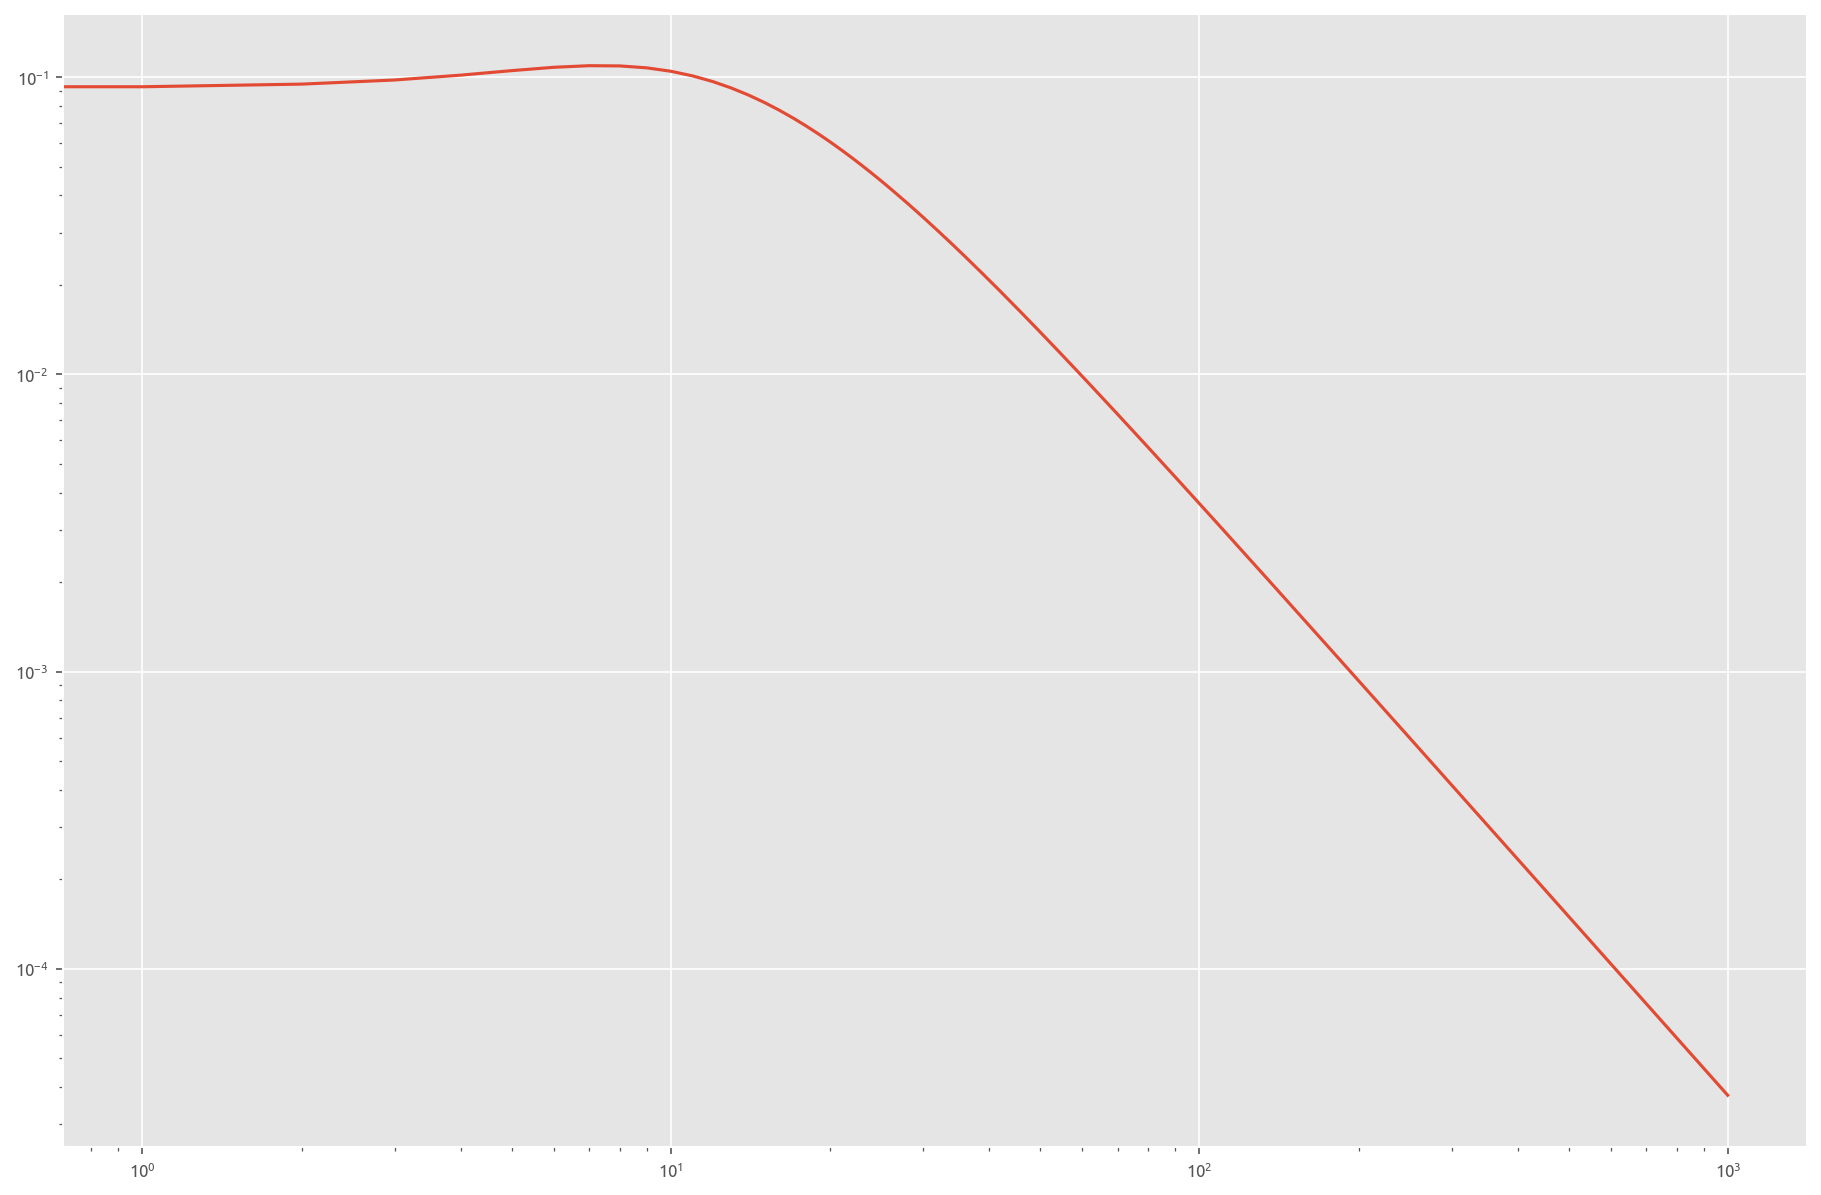

In [22]:
plt.loglog(z,np.abs(B))

Log log is linear after some distance.

Fit $cz^{b}$

In [23]:
A=np.hstack([np.ones(len(B[300:]))[:,np.newaxis],np.log(z[300:])[:,np.newaxis]])
log_c,b=np.linalg.lstsq(A,np.log(np.abs(B[300:]))) [0]
c=np.exp(log_c)
display(b)

/home/prasanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


-1.9985864302375913